In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

For this analysis, we looked at the number of citations in each of Pittsburgh's neighborhoods. This provides a good metric to see what the relative safety level of each area is, and therefore which neighborhood would be best to live in. The citations vary from littering to disorderly conduct, but I wasn't able to get a decent graph to show the distribution because of how many different kinds are listed in the dataset.

Here is a general look at the spreadsheet.

In [3]:
chart = pd.read_csv('CitationsSpread.csv')
chart

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16290,26807,1105891,23179537,F,B,28.0,2023-11-12T00:54:00,"1700 Block E CARSON ST PITTSBURGH, PA",5505 Public Drunkenness,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16291,26808,1105892,23179537,F,B,28.0,2023-11-12T00:54:00,"1700 Block E CARSON ST PITTSBURGH, PA",601.12 Interference with Official Duties,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16292,26809,1105893,23179983,F,W,23.0,2023-11-12T23:31:00,"E CARSON ST & S 13TH ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.985330,40.428783
16293,26810,1105894,23180037,F,B,24.0,2023-11-13T02:08:00,"S 17TH ST & E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.982051,40.428843


The first thing I did was organize the neighborhoods based on the number of citations per neighborhood and put them in alphabetical order.

In [4]:
# neighbor_citat = chart.groupby('NEIGHBORHOOD').count().reset_index()
# print(neighbor_citat)

neighbor_citat = chart.groupby('NEIGHBORHOOD')['_id'].count().reset_index()
neighbor_citat.columns = ['Neighborhood', 'Number of Citations']
neighbor_citat.set_index('Neighborhood', inplace=True)
neighbor_citat

,Number of Citations
Neighborhood,
Allegheny Center,157
Allegheny West,24
Allentown,191
Arlington,102
Arlington Heights,7
...,...
Upper Lawrenceville,35
West End,31
West Oakland,63


Next, I organized them by number of citations. As you can see, South Side Flats has the greatest number of citations by far at 3453, while Outside State and Outside County only have 2.

In [5]:
sorted = chart["NEIGHBORHOOD"].value_counts()
sorted.to_csv('CitationCount.csv')
sorted


South Side Flats             3453
Central Business District    2027
Central Oakland               665
North Shore                   577
Carrick                       456
                             ... 
St. Clair                       3
Mt. Oliver Boro                 3
Chartiers City                  3
Outside State                   2
Outside County                  2
Name: NEIGHBORHOOD, Length: 97, dtype: int64

Since there were so many values, I took the top and bottom 10 neighborhoods to give a clearer look at where each neighborhood falls

In [6]:
most = sorted.iloc[0:9]
least = sorted.iloc[87:]

After South Side Flats and the Central Business District, you can see that the number of citations falls dramatically, which makes sense since South Side Flats has a large concentration of bars and restaurants, which would obviously result in a lot of citations, and the Central Business District has a lot of general foot traffic.

In [7]:
most

South Side Flats             3453
Central Business District    2027
Central Oakland               665
North Shore                   577
Carrick                       456
East Allegheny                360
Mount Washington              329
Brookline                     310
Shadyside                     304
Name: NEIGHBORHOOD, dtype: int64

The neighborhoods with the least amount of citations are also unsurprising given that these are some of the least populated neighborhoods of Pittsburgh. Arlington Heights for example, only has a population of 244. Later on, I'll analyze the number of citations per capita.

In [8]:
least

Arlington Heights          7
Summer Hill                7
Swisshelm Park             6
Ridgemont                  4
Mt. Oliver Neighborhood    4
St. Clair                  3
Mt. Oliver Boro            3
Chartiers City             3
Outside State              2
Outside County             2
Name: NEIGHBORHOOD, dtype: int64

Before that, here's a bar graph showing the citations per neighborhood. Once again, South Side Flats clearly has way more citations than any other neighborhood, which makes the graph kind of hard to read.

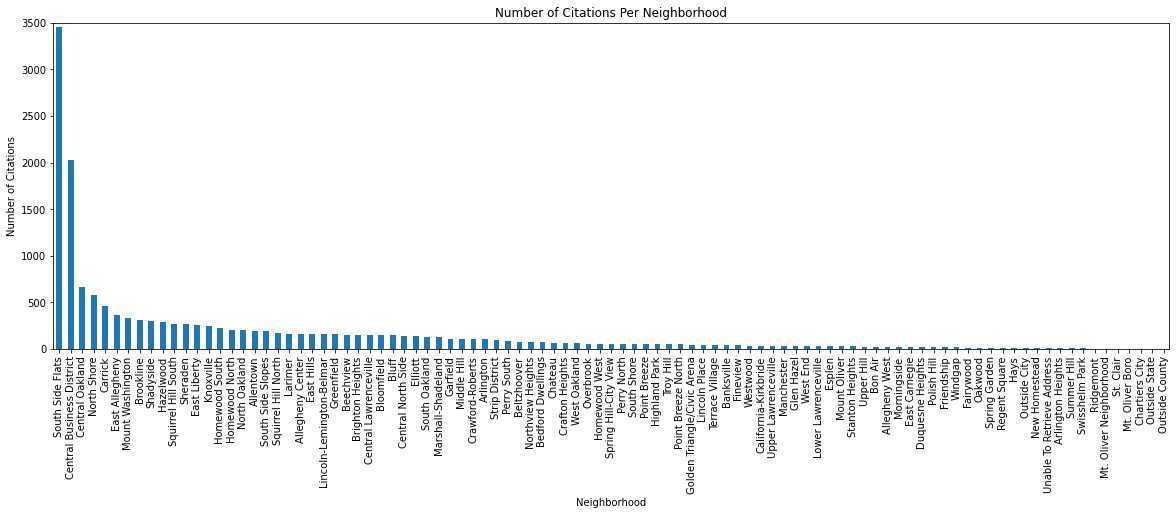

In [9]:
plt.figure(figsize=(20,6))

chart['NEIGHBORHOOD'].value_counts().plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Citations')
plt.title('Number of Citations Per Neighborhood')
plt.xticks(rotation=90)
plt.ylim(0,3500)
plt.show()

To make it a little easier, I removed South Side Flats and limited the number of neighborhoods to the top 40.

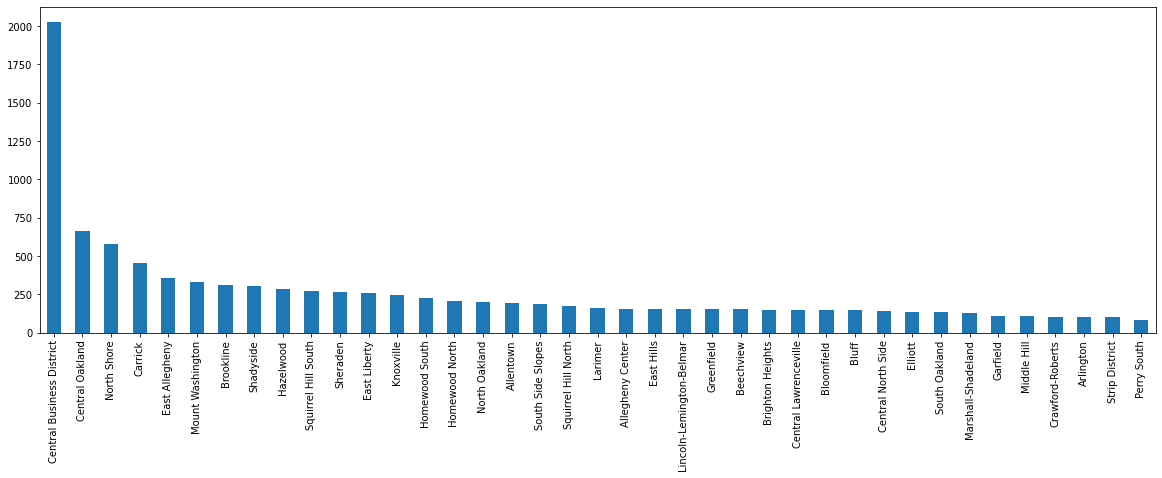

In [10]:
signif = sorted.iloc[1:40]
plt.figure(figsize=(20,6))
signif.plot.bar()

Here are the neighborhoods from Northview Heights onwards.

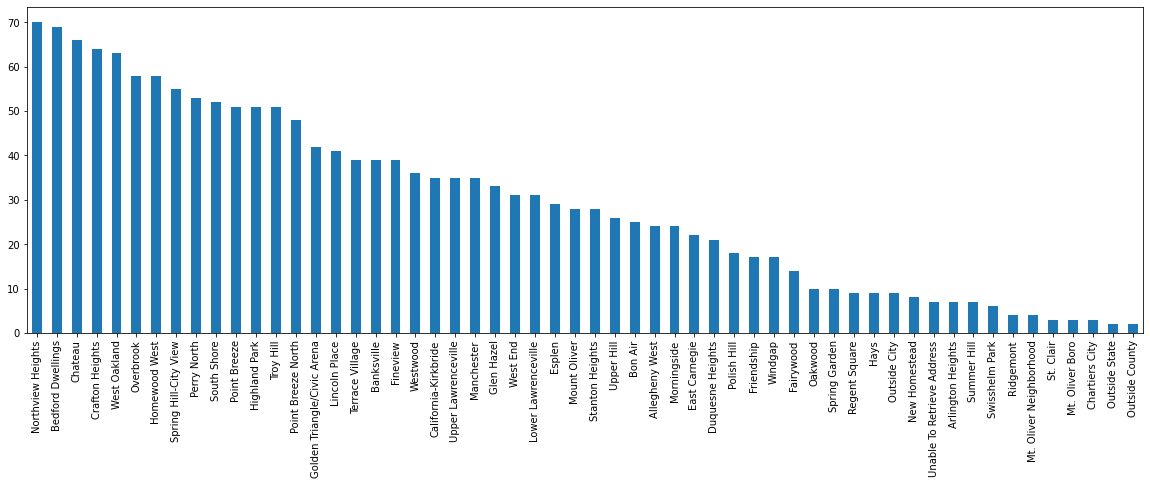

In [11]:
test = sorted.iloc[41:]
plt.figure(figsize=(20,6))
test.plot.bar()

And here are the neighborhoods with the top 10 most citations including South Side Flats.

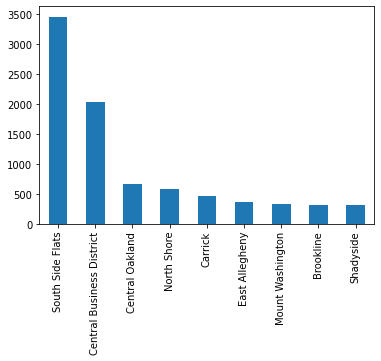

In [12]:
pd.Series(most).plot.bar()


And the least amount of citations.

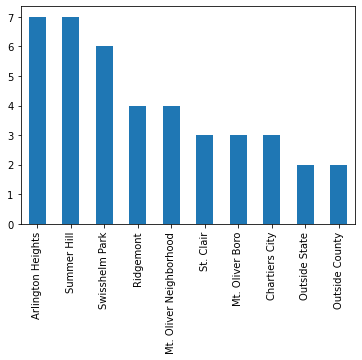

In [13]:
pd.Series(least).plot.bar()

As I said earlier, a lot of the data is skewed due to population differences, so I took a database with the populations for each neighborhood to see the number of citations per capita.

In [14]:
pop = pd.read_csv("PopulationData.csv", parse_dates=True)
pop = pop.drop(['_id','Id', 'Margin of Error; Total'], axis=1).sort_values(by='Estimate; Total')
pop.set_index('Neighborhood', inplace=True)

Once I had this, I had to merge to two tables. Somehow the population dataset had 6 fewer neighborhoods than the citation dataset, so there ended up being a few neighborhoods without population data.

In [15]:
pop = pop.sort_index()
pop

,Estimate; Total
Neighborhood,
Allegheny Center,1411.0
Allegheny West,343.0
Allentown,2558.0
Arlington,1852.0
Arlington Heights,272.0
...,...
Upper Lawrenceville,2754.0
West End,235.0
West Oakland,1717.0


In [16]:
neighbor_citat
df = pd.DataFrame(neighbor_citat)
df

,Number of Citations
Neighborhood,
Allegheny Center,157
Allegheny West,24
Allentown,191
Arlington,102
Arlington Heights,7
...,...
Upper Lawrenceville,35
West End,31
West Oakland,63


In [17]:
neighbor_citat = pd.DataFrame(neighbor_citat)
merged = neighbor_citat.merge(pop, how='left', left_on='Neighborhood', right_on='Neighborhood')
#merged
df = pd.DataFrame(merged)
df

,Number of Citations,Estimate; Total
Neighborhood,,
Allegheny Center,157,1411.0
Allegheny West,24,343.0
Allentown,191,2558.0
Arlington,102,1852.0
Arlington Heights,7,272.0
...,...,...
Upper Lawrenceville,35,2754.0
West End,31,235.0
West Oakland,63,1717.0


This is where I calculated the citation number per capita, but they're currently sorted alphabetically instead of numerically.

In [18]:
capita = df.iloc[:,0].div(df.iloc[:,1])
capita.sort_index()

Neighborhood
Allegheny Center       0.111269
Allegheny West         0.069971
Allentown              0.074668
Arlington              0.055076
Arlington Heights      0.025735
                         ...   
Upper Lawrenceville    0.012709
West End               0.131915
West Oakland           0.036692
Westwood               0.010178
Windgap                0.011082
Length: 97, dtype: float64

Once they're sorted, Chateau far outweighs the other neighborhoods in terms of citations per capita with an insane 22 citations per person. However, Chateau only has a population of 3 in the dataset, so this makes sense. Although it's less extreme, South Shore's high number is also caused by a low population (12 people), so they both need to be removed to prevent the data from being skewed.

In [19]:
cit_cap = capita.sort_values()
cit_cap.iloc[0:88]

Neighborhood
Swisshelm Park                0.004461
Chartiers City                0.005357
Summer Hill                   0.005877
Stanton Heights               0.005881
Morningside                   0.007357
                               ...    
Central Business District     0.499261
South Side Flats              0.548792
North Shore                   2.814634
South Shore                   4.333333
Chateau                      22.000000
Length: 88, dtype: float64

When removing the outliar, South Shore and North Shore far outweight the others, with South Side Flats and Central business District, the original neighborhoods with the highest citations, coming in 3rd and 4th respectively.

In [25]:
capita_prune = cit_cap.iloc[0:86]
capita_prune

Neighborhood
Swisshelm Park               0.004461
Chartiers City               0.005357
Summer Hill                  0.005877
Stanton Heights              0.005881
Morningside                  0.007357
                               ...   
Strip District               0.135207
East Allegheny               0.171838
Central Business District    0.499261
South Side Flats             0.548792
North Shore                  2.814634
Length: 86, dtype: float64

Now we can finally look at the real top and bottom 10 neighborhood. 

In [21]:
best = capita_prune.iloc[0:10]
best

Neighborhood
Swisshelm Park      0.004461
Chartiers City      0.005357
Summer Hill         0.005877
Stanton Heights     0.005881
Morningside         0.007357
Highland Park       0.007489
New Homestead       0.008222
Duquesne Heights    0.008327
Regent Square       0.008712
Friendship          0.009239
dtype: float64

In [32]:
worst = capita_prune.iloc[76:]
worst

Neighborhood
Larimer                      0.097502
Homewood South               0.099736
Allegheny Center             0.111269
Central Oakland              0.114222
West End                     0.131915
Strip District               0.135207
East Allegheny               0.171838
Central Business District    0.499261
South Side Flats             0.548792
North Shore                  2.814634
dtype: float64

From the table and graphs we can see that Swisshelm Park is the best neighborhood, while North Shore is by far the worst neighborhood (ignoring Chateau and South Shore as outliars).

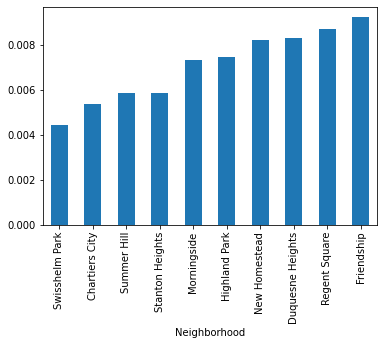

In [23]:
best.plot.bar()

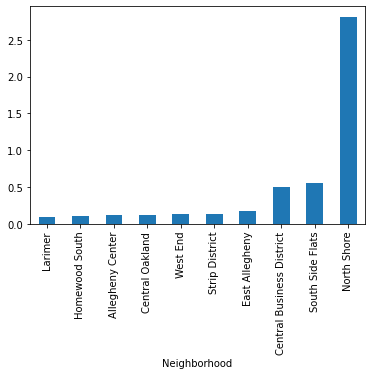

In [33]:
worst.plot.bar()

**Top 5 Best Neighborhoods:**
1. Swisshelm Park
2. Chartiers City
3. Summer Hill
4. Stanton Heights
5. Morningside

**Top 5 Worst Neighborhoods**
1. North Shore
2. South Side Flats
3. Central Business District
4. East Allegheny
5. Strip District